# CPS1.2 - Computer Problem Set 1.2
### **Stochastic integration**

## 1 - Approximation of $\int_0^TW_SdW_s$  

In [73]:
import numpy as np
import matplotlib.pyplot as plt

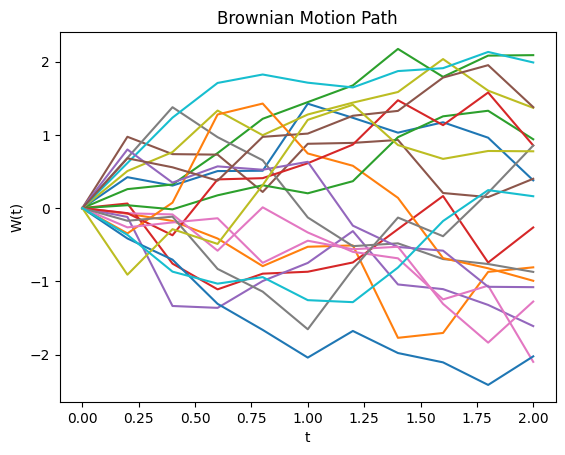

In [74]:
# Constants
T = 2
M = 20 # Number of simulation
n = 10 # Number of steps

# Brownian Motion Path
def create_W(M,n,T):
    W = np.zeros((n+1,M))
    dt = T/n
    W[1:n+1,:] = np.sqrt(dt)*np.random.randn(n,M)
    W = np.cumsum(W,axis=0)
    return W

W_test = create_W(M,n,T)

# Plot
plt.plot(np.linspace(0,T,n+1),W_test)
plt.xlabel('t')
plt.ylabel('W(t)')
plt.title('Brownian Motion Path')
plt.show()

In [75]:
def In(n,W):
    sum = 0
    for i in range(1,n+1):
        sum += W[i-1] * (W[i]-W[i-1])
    return sum

def Jn(n,W):
    sum = 0
    for i in range(1,n+1):
        sum += W[i] * (W[i]-W[i-1])
    return sum

def Kn(n,W):
    sum = 0
    for i in range(1,n+1):
        sum += ((W[i] + W[i-1])/2) *  (W[i]-W[i-1]) 
    return sum   

In [76]:
def sampling(M,n,T,pprint=False):
    W = create_W(M,n,T)
    I= []
    J = []
    K = []
    for m in range(M):
        Wm = W[:,m]
        I.append(0.5 * Wm[n]**2 - In(n,Wm))
        J.append(0.5 * Wm[n]**2 - Jn(n,Wm))
        K.append(0.5 * Wm[n]**2 - Kn(n,Wm))
    if pprint:
        print('Results for n = ',n)
        print('I= ',np.mean(I))
        print('B = ',np.mean(J))
        print('C = ',np.mean(K))
    return (np.mean(I),np.mean(J),np.mean(K),np.std(I),np.std(J),np.std(K))

sampling(M,n,T,True)

Results for n =  10
I=  1.1272733792460257
B =  -1.1272733792460257
C =  -3.961674738262033e-17


(1.1272733792460257,
 -1.1272733792460257,
 -3.961674738262033e-17,
 0.38164406739381035,
 0.38164406739381046,
 2.0518469369044483e-16)

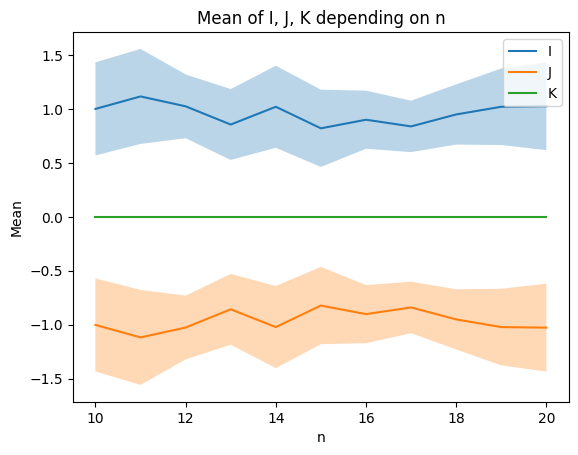

In [77]:
meansI,meansJ,meansK = [],[],[]
confsI,confsJ,confsK = [],[],[]

for n in range(10,21):
    meanI,meanJ,meanK,confI,confJ,confK = sampling(M,n,T)
    meansI.append(meanI)
    meansJ.append(meanJ)
    meansK.append(meanK)
    confsI.append(confI)
    confsJ.append(confJ)
    confsK.append(confK)

plt.figure()
plt.title('Mean of I, J, K depending on n')
plt.plot(range(10,21),meansI,label='I')
plt.plot(range(10,21),meansJ,label='J')
plt.plot(range(10,21),meansK,label='K')
# confidence interval
plt.fill_between(range(10,21), np.array(meansI)-np.array(confsI), np.array(meansI)+np.array(confsI), alpha=0.3)
plt.fill_between(range(10,21), np.array(meansJ)-np.array(confsJ), np.array(meansJ)+np.array(confsJ), alpha=0.3)
plt.fill_between(range(10,21), np.array(meansK)-np.array(confsK), np.array(meansK)+np.array(confsK), alpha=0.3)
plt.xlabel('n')
plt.ylabel('Mean')
plt.legend()
plt.show()


## 2 - Using other random variables 


In [78]:
def An(n,W):
    sum = 0
    for i in range(1,n+1):
        sum += np.exp((i-1)*T/n) * (W[i]-W[i-1])
    return sum

def Bn(n,W):
    sum = 0
    for i in range(1,n+1):
        sum += np.exp((i)*T/n) * (W[i]-W[i-1])
    return sum

def Cn(n,W):
    sum = 0
    for i in range(1,n+1):
        sum += np.exp((2*i-1)*T/(2*n)) * (W[i]-W[i-1])
    return sum

In [79]:
def sampling_2(M,n,T,pprint=False):
    W = create_W(M,n,T)
    A= []
    B = []
    C = []
    for m in range(M):
        Wm = W[:,m]
        A.append(np.exp(T) - An(n,Wm))
        B.append(np.exp(T) - Bn(n,Wm))
        C.append(np.exp(T) - Cn(n,Wm))
    if pprint:
        print('Results for n = ',n)
        print('A= ',np.mean(A))
        print('B = ',np.mean(B))
        print('C = ',np.mean(C))
    return (np.mean(A),np.mean(B),np.mean(C),np.std(A),np.std(B),np.std(C))

sampling_2(M,n,T,True)

Results for n =  20
A=  7.525256407834462
B =  7.539580719364061
C =  7.532239546998713


(7.525256407834462,
 7.539580719364061,
 7.532239546998713,
 5.125175621039651,
 5.664195046403319,
 5.387948994250024)

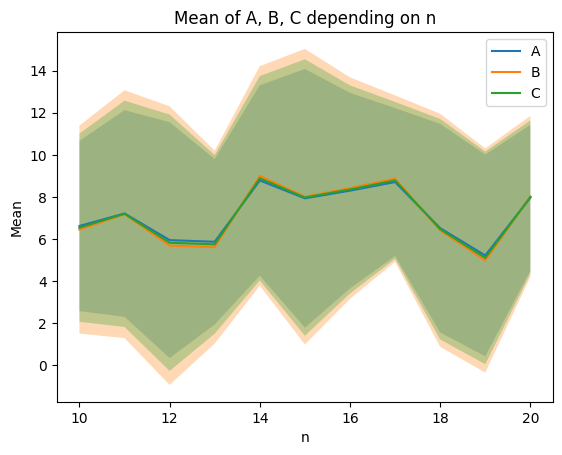

In [80]:
meansA,meansB,meansC = [],[],[]
confsA,confsB,confsC = [],[],[]

for n in range(10,21):
    meanA,meanB,meanC,confA,confB,confC = sampling_2(M,n,T)
    meansA.append(meanA)
    meansB.append(meanB)
    meansC.append(meanC)
    confsA.append(confA)
    confsB.append(confB)
    confsC.append(confC)

plt.figure()
plt.title('Mean of A, B, C depending on n')
plt.plot(range(10,21),meansA,label='A')
plt.plot(range(10,21),meansB,label='B')
plt.plot(range(10,21),meansC,label='C')
# confidence interval
plt.fill_between(range(10,21), np.array(meansA)-np.array(confsA), np.array(meansA)+np.array(confsA), alpha=0.3)
plt.fill_between(range(10,21), np.array(meansB)-np.array(confsB), np.array(meansB)+np.array(confsB), alpha=0.3)
plt.fill_between(range(10,21), np.array(meansC)-np.array(confsC), np.array(meansC)+np.array(confsC), alpha=0.3)
plt.xlabel('n')
plt.ylabel('Mean')
plt.legend()
plt.show()


## 3 - Last Simulation

In [81]:
def An_2(n,W):
    out = 0
    out += np.sin(W[n])
    sum = 0
    for i in range(1,n+1):
        sum += np.sin(W[i-1])
    return out + 1/(2*n) * sum

In [82]:
def sampling_3(M,n,T,pprint=False):
    W = create_W(M,n,T)
    A= []
    for m in range(M):
        Wm = W[:,m]
        A.append(An_2(n,Wm))
    if pprint:
        print('Results for n = ',n)
        print('A= ',np.mean(A))
    return (np.mean(A),np.std(A))

sampling_3(M,n,T,True)

Results for n =  20
A=  0.1023544085468782


(0.1023544085468782, 0.953973730782114)

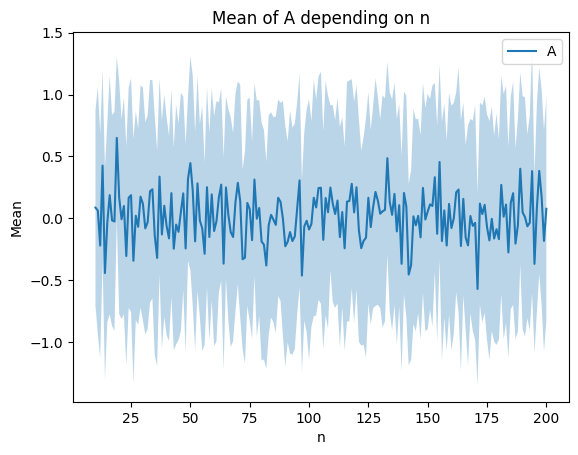

In [87]:
meansA = []
confsA = []

for n in range(10,201):
    meanA,confA = sampling_3(M,n,T)
    meansA.append(meanA)
    confsA.append(confA)

plt.figure()
plt.title('Mean of A depending on n')
plt.plot(range(10,201),meansA,label='A')
# confidence interval
plt.fill_between(range(10,201), np.array(meansA)-np.array(confsA), np.array(meansA)+np.array(confsA), alpha=0.3)
plt.xlabel('n')
plt.ylabel('Mean')
plt.legend()
plt.show()